In [1]:
# Thesis Results Analysis
# Dieses Notebook erstellt Grafiken und Tabellen für die Masterarbeit
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

# Setup für relative Imports
current_dir = Path.cwd()
project_root = current_dir.parent if current_dir.name == "results" else current_dir
sys.path.append(str(project_root))

from helper_tools.evaluation import generate_report

# Stil für schöne Plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Setup completed!")


2025-06-20 09:45:04,078 - INFO - Initializing llama-3.3-70b at Cerebras - 30.0 RPM
2025-06-20 09:45:04,123 - INFO - Embeddings model bge-m3 initialized
2025-06-20 09:45:04,152 - INFO - Langfuse handler initialized
2025-06-20 09:45:04,168 - INFO - Langfuse client initialized
2025-06-20 09:45:04,169 - INFO - Initializing Qdrant vector store
2025-06-20 09:45:07,635 - INFO - Qdrant vector store initialized
2025-06-20 09:45:07,754 - INFO - Qdrant description vector store initialized
2025-06-20 09:45:07,837 - INFO - Qdrant example vector store initialized
2025-06-20 09:45:08,101 - INFO - Dataset wikidata_predicates: exists, triple count: 53680
2025-06-20 09:45:10,977 - INFO - Dataset wikidata_class_hierarchy: exists, triple count: 1612566
2025-06-20 09:45:10,978 - INFO - Fuseki clients initialized
2025-06-20 09:45:10,979 - INFO - SPARQL wrapper initialized


Setup completed!


In [20]:
def get_model_display_name(file_path):
    """Get a nice display name for the model based on filename."""
    filename = os.path.basename(file_path)
    
    # Remove .xlsx extension to get the model identifier
    model_id = filename.replace(".xlsx", "")
    
    # Model ID zu Anzeigename Mapping
    model_mapping = {
        # GenIE und SynthIE Modelle
        "GenIE_base_fe": "GenIE Base (FE)",
        "GenIE_base_sc": "GenIE Base (SC)", 
        "SynthIE_base_fe": "SynthIE Base (FE)",
        "SynthIE_base_sc": "SynthIE Base (SC)",
        "SynthIE_large_fe": "SynthIE Large (FE)",
        
        # Baseline und andere Ansätze
        "01_Initial_Baseline": "Initial Baseline",
        "02_Baseline_v2": "Baseline v2",
        "03_Gen1": "Generation 1",
        "04_Gen1_PredEx": "Gen1 with PredEx",
        "05_Gen1v2": "Generation 1 v2",
        "06_Gen2": "Generation 2",
        "07_One_Agent": "One Agent",
        "08_Network": "Network Approach",
        
        # Für den Fall, dass es andere Formate gibt
        "genie_base_fe": "GenIE Base (FE)",
        "genie_base_sc": "GenIE Base (SC)", 
        "synthie_base_fe": "SynthIE Base (FE)",
        "synthie_base_sc": "SynthIE Base (SC)",
        "synthie_large_fe": "SynthIE Large (FE)"
    }
    
    # Verwende Mapping falls vorhanden, sonst den ursprünglichen model_id
    display_name = model_mapping.get(model_id, model_id)
    return display_name

# Lade alle Excel-Dateien aus dem result_evaluation_logs Ordner
def load_evaluation_files():
    """Load all evaluation files from result_evaluation_logs directory."""
    results_dir = Path("result_evaluation_logs")
    excel_files = list(results_dir.glob("*.xlsx"))
    
    print(f"Gefundene Evaluations-Dateien: {len(excel_files)}")
    for file in excel_files:
        print(f"  - {file.name}")
    
    return excel_files

evaluation_files = load_evaluation_files()


Gefundene Evaluations-Dateien: 11
  - Z_synthIE_large_fe.xlsx
  - Z_GenIE_base_fe.xlsx
  - H_Full-Network-Architecture_Gen2.xlsx
  - Z_synthIE_base_fe.xlsx
  - B_Task_Modularisation_Gen1.xlsx
  - C_Error_Incorporation_Gen1_PredEx.xlsx
  - C_Error_Incorporation_Gen1.xlsx
  - C_Error_Incorporation_Baseline.xlsx
  - Z_synthIE_base_sc.xlsx
  - Z_GenIE_base_sc.xlsx
  - A_Initial_Baseline_Baseline.xlsx


In [21]:
# Generiere Reports für alle Modelle und extrahiere Triple Macro F1-Scores
model_results = []

print("Generiere Reports für alle Modelle...")
for file_path in evaluation_files:
    try:
        # Generiere Report mit Macro-Averaging
        report = generate_report(str(file_path), average_type="macro")
        
        # Extrahiere Triple F1-Score
        triple_f1 = report.loc["Triple", "F1-Score"]
        
        # Modellname für Anzeige
        model_name = get_model_display_name(str(file_path))
        
        model_results.append({
            "Model": model_name,
            "Triple_F1_Macro": triple_f1,
            "File": file_path.name
        })
        
        print(f"✓ {model_name}: F1={triple_f1:.3f}")
        
    except Exception as e:
        print(f"✗ Fehler bei {file_path.name}: {e}")

# Erstelle DataFrame für bessere Handhabung
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values("Triple_F1_Macro", ascending=False)

print(f"\nErgebnisse für {len(results_df)} Modelle geladen:")
print(results_df[["Model", "Triple_F1_Macro"]].to_string(index=False))


Generiere Reports für alle Modelle...
✓ Z_synthIE_large_fe: F1=0.831
✓ Z_GenIE_base_fe: F1=0.391
✓ H_Full-Network-Architecture_Gen2: F1=0.665
✓ Z_synthIE_base_fe: F1=0.775
✓ B_Task_Modularisation_Gen1: F1=0.173
✓ C_Error_Incorporation_Gen1_PredEx: F1=0.250
✓ C_Error_Incorporation_Gen1: F1=0.250
✓ C_Error_Incorporation_Baseline: F1=0.250
✓ Z_synthIE_base_sc: F1=0.789
✓ Z_GenIE_base_sc: F1=0.372
✓ A_Initial_Baseline_Baseline: F1=0.322

Ergebnisse für 11 Modelle geladen:
                            Model  Triple_F1_Macro
               Z_synthIE_large_fe            0.831
                Z_synthIE_base_sc            0.789
                Z_synthIE_base_fe            0.775
 H_Full-Network-Architecture_Gen2            0.665
                  Z_GenIE_base_fe            0.391
                  Z_GenIE_base_sc            0.372
      A_Initial_Baseline_Baseline            0.322
C_Error_Incorporation_Gen1_PredEx            0.250
       C_Error_Incorporation_Gen1            0.250
   C_Error_Incorp

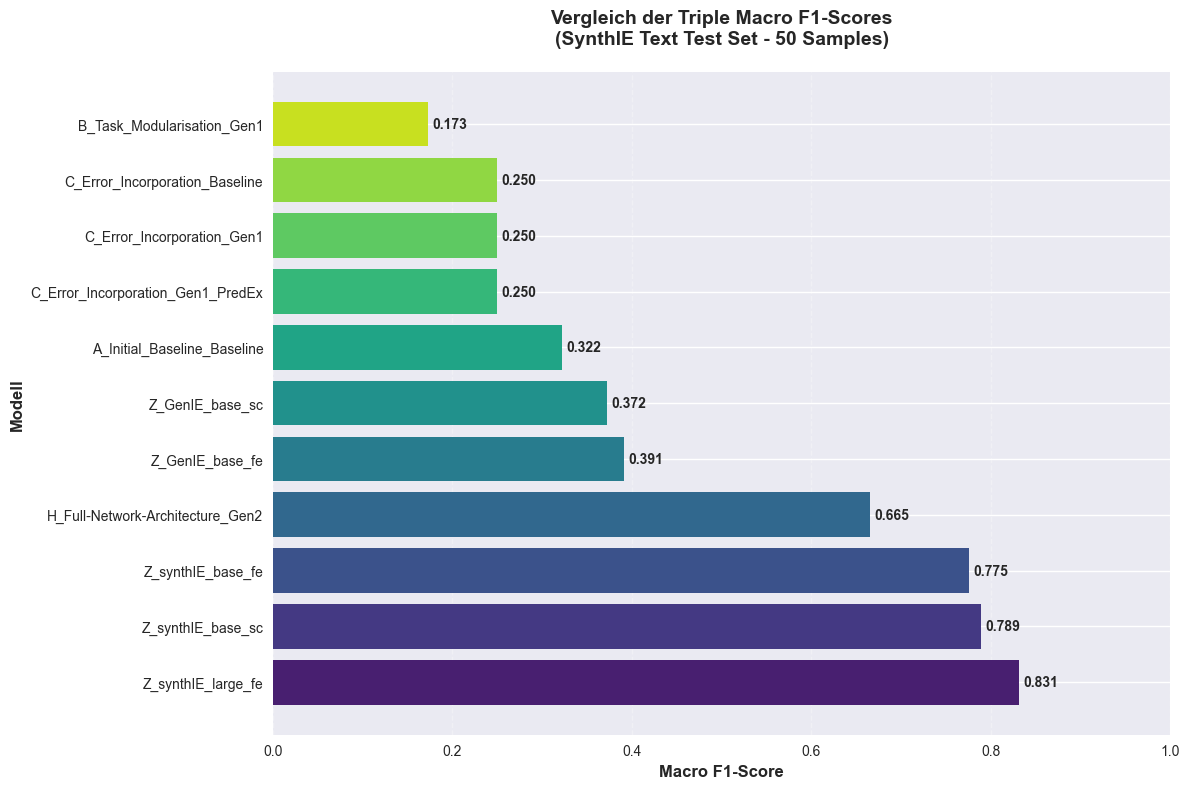

Grafik als 'triple_f1_comparison.png' gespeichert!


<Figure size 800x550 with 0 Axes>

In [22]:
# Erstelle die Vergleichsgrafik für Triple Macro F1-Scores
plt.figure(figsize=(12, 8))

# Erstelle horizontales Balkendiagramm für bessere Lesbarkeit
bars = plt.barh(range(len(results_df)), results_df["Triple_F1_Macro"], 
                color=sns.color_palette("viridis", len(results_df)))

# Konfiguriere die Achsen
plt.yticks(range(len(results_df)), results_df["Model"])
plt.xlabel("Macro F1-Score", fontsize=12, fontweight='bold')
plt.ylabel("Modell", fontsize=12, fontweight='bold')
plt.title("Vergleich der Triple Macro F1-Scores\n(SynthIE Text Test Set - 50 Samples)", 
          fontsize=14, fontweight='bold', pad=20)

# Füge Werte auf den Balken hinzu
for i, (bar, value) in enumerate(zip(bars, results_df["Triple_F1_Macro"])):
    plt.text(value + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{value:.3f}', ha='left', va='center', fontweight='bold')

# Setze x-Achse von 0 bis 1
plt.xlim(0, 1)

# Füge Gitterlinien hinzu für bessere Lesbarkeit
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Optimiere Layout
plt.tight_layout()

# Zeige die Grafik
plt.show()

# Zusätzlich: Speichere die Grafik als hochqualitative PNG für die Thesis
plt.savefig("triple_f1_comparison.png", dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
print("Grafik als 'triple_f1_comparison.png' gespeichert!")


In [23]:
# Erstelle eine detaillierte Tabelle mit allen Triple-Metriken
print("=== Detaillierte Triple-Metriken für alle Modelle ===\n")

# Error patterns from the UI files
error_patterns = [
    r'^Error',
    r'error',
    r'exception',
    r'failed',
    r'Recursion limit',
    r'Traceback',
    r'not found',
    r'invalid',
    r'crash',
    r'cannot',
    r'undefined',
    r'unsupported',
    r'failure',
]
error_regex = '|'.join(error_patterns)

detailed_results = []

for file_path in evaluation_files:
    try:
        # Lade Excel-Datei um Errors zu zählen
        df = pd.read_excel(file_path)
        
        # Zähle Errors
        error_count = df['Result String'].str.contains(error_regex, case=False, regex=True, na=False).sum()
        total_count = len(df)
        error_percentage = (error_count / total_count) if total_count > 0 else 0
        
        # Generiere Report mit Macro-Averaging
        report = generate_report(str(file_path), average_type="macro")
        
        # Extrahiere alle Triple-relevanten Metriken
        model_name = get_model_display_name(str(file_path))
        
        detailed_results.append({
            "Model": model_name,
            "Triple_Precision": report.loc["Triple", "Precision"],
            "Triple_Recall": report.loc["Triple", "Recall"], 
            "Triple_F1": report.loc["Triple", "F1-Score"],
            "Triple_w_Parents_F1": report.loc["Triple with Parents", "F1-Score"],
            "Triple_w_Related_F1": report.loc["Triple with Related", "F1-Score"],
            "Error_Rate": error_percentage
        })
        
    except Exception as e:
        print(f"Fehler bei {file_path.name}: {e}")

# Erstelle detaillierte Tabelle
detailed_df = pd.DataFrame(detailed_results)
detailed_df = detailed_df.sort_values("Triple_F1", ascending=False)

# Formatiere für bessere Anzeige
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

detailed_df


=== Detaillierte Triple-Metriken für alle Modelle ===



,Model,Triple_Precision,Triple_Recall,Triple_F1,Triple_w_Parents_F1,Triple_w_Related_F1,Error_Rate
0,Z_synthIE_large_fe,0.835,0.832,0.831,0.841,0.858,0.000
8,Z_synthIE_base_sc,0.789,0.798,0.789,0.819,0.833,0.000
3,Z_synthIE_base_fe,0.784,0.769,0.775,0.812,0.826,0.000
2,H_Full-Network-Architecture_Gen2,0.728,0.635,0.665,0.728,0.728,0.000
1,Z_GenIE_base_fe,0.527,0.344,0.391,0.406,0.419,0.000
9,Z_GenIE_base_sc,0.527,0.320,0.372,0.391,0.404,0.000
10,A_Initial_Baseline_Baseline,0.294,0.380,0.322,0.358,0.358,0.200
5,C_Error_Incorporation_Gen1_PredEx,0.250,0.250,0.250,0.250,0.250,0.000
6,C_Error_Incorporation_Gen1,0.250,0.250,0.250,0.250,0.250,0.000
7,C_Error_Incorporation_Baseline,0.250,0.250,0.250,0.250,0.250,0.000
